In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("oasis_longitudinal.csv")
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
data.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [4]:
# Results on subject's 1st visit

df = data[data["Visit"] == 1]
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,OAS2_0182,OAS2_0182_MR1,Demented,1,0,M,R,73,12,NaN,23.0,0.5,1661,0.698,1.056
361,OAS2_0183,OAS2_0183_MR1,Nondemented,1,0,F,R,66,13,2.0,30.0,0.0,1495,0.746,1.174
365,OAS2_0184,OAS2_0184_MR1,Demented,1,0,F,R,72,16,3.0,24.0,0.5,1354,0.733,1.296
367,OAS2_0185,OAS2_0185_MR1,Demented,1,0,M,R,80,16,1.0,28.0,0.5,1704,0.711,1.030


In [5]:
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [6]:
# Fill null values in SES column with mean value

df['SES']= df['SES'].fillna(data['SES'].mean())

<ipython-input-6-171f973c6747>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SES']= df['SES'].fillna(data['SES'].mean())


In [7]:
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [8]:
# Drop columns to reduce dataframe and X values

df=df.drop(['Subject ID', 'MRI ID', 'MR Delay', 'Visit', 'Hand'], axis=1) 
df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.000000,27.0,0.0,1987,0.696,0.883
2,Demented,M,75,12,2.460452,23.0,0.5,1678,0.736,1.046
5,Nondemented,F,88,18,3.000000,28.0,0.0,1215,0.710,1.444
7,Nondemented,M,80,12,4.000000,28.0,0.0,1689,0.712,1.039
10,Demented,M,71,16,2.460452,28.0,0.5,1357,0.748,1.293
...,...,...,...,...,...,...,...,...,...,...
359,Demented,M,73,12,2.460452,23.0,0.5,1661,0.698,1.056
361,Nondemented,F,66,13,2.000000,30.0,0.0,1495,0.746,1.174
365,Demented,F,72,16,3.000000,24.0,0.5,1354,0.733,1.296
367,Demented,M,80,16,1.000000,28.0,0.5,1704,0.711,1.030


In [9]:
# Binary encoded gender 

clean = df.copy()
data_binary_encoded = pd.get_dummies(clean, columns=["M/F"])
data_binary_encoded.head()

,Group,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_F,M/F_M
0,Nondemented,87,14,2.000000,27.0,0.0,1987,0.696,0.883,0,1
2,Demented,75,12,2.460452,23.0,0.5,1678,0.736,1.046,0,1
5,Nondemented,88,18,3.000000,28.0,0.0,1215,0.710,1.444,1,0
7,Nondemented,80,12,4.000000,28.0,0.0,1689,0.712,1.039,0,1
10,Demented,71,16,2.460452,28.0,0.5,1357,0.748,1.293,0,1


In [10]:
# Rename columns to Female and Male subjects

data_binary_encoded=data_binary_encoded.rename(columns={'M/F_M':'Male','M/F_F':'Female'})
data_binary_encoded

,Group,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Female,Male
0,Nondemented,87,14,2.000000,27.0,0.0,1987,0.696,0.883,0,1
2,Demented,75,12,2.460452,23.0,0.5,1678,0.736,1.046,0,1
5,Nondemented,88,18,3.000000,28.0,0.0,1215,0.710,1.444,1,0
7,Nondemented,80,12,4.000000,28.0,0.0,1689,0.712,1.039,0,1
10,Demented,71,16,2.460452,28.0,0.5,1357,0.748,1.293,0,1
...,...,...,...,...,...,...,...,...,...,...,...
359,Demented,73,12,2.460452,23.0,0.5,1661,0.698,1.056,0,1
361,Nondemented,66,13,2.000000,30.0,0.0,1495,0.746,1.174,1,0
365,Demented,72,16,3.000000,24.0,0.5,1354,0.733,1.296,1,0
367,Demented,80,16,1.000000,28.0,0.5,1704,0.711,1.030,0,1


In [11]:
# Assign X (DATA COLUMNS) and y "Group" (target = DEMENTED/NONDEMENTED/CONVERTED)

X = data_binary_encoded.drop("Group", axis=1)
y = data_binary_encoded["Group"]
print(X.shape, y.shape)

(150, 10) (150,)


In [12]:
# Split our data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
## LOGISTIC REGRESSION (150 SAMPLES) ##

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)
classifier

LogisticRegression(max_iter=10000)

In [14]:
# Fit (train) or model using the training data

classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [15]:
# Validate the model using the test data

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9107142857142857
Testing Data Score: 0.868421052631579


In [16]:
# Make predictions

predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Nondemented' 'Nondemented' 'Nondemented' 'Nondemented' 'Nondemented'
 'Nondemented' 'Demented' 'Nondemented' 'Demented' 'Demented']
First 10 Actual labels: ['Converted', 'Nondemented', 'Converted', 'Nondemented', 'Nondemented', 'Nondemented', 'Nondemented', 'Converted', 'Demented', 'Demented']


In [17]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Nondemented,Converted
1,Nondemented,Nondemented
2,Nondemented,Converted
3,Nondemented,Nondemented
4,Nondemented,Nondemented
5,Nondemented,Nondemented
6,Demented,Nondemented
7,Nondemented,Converted
8,Demented,Demented
9,Demented,Demented


In [18]:
## SVM - Support Vector Machine (150 SAMPLES) ##

target = data_binary_encoded["Group"]
target_names = ["Demented", "Nondemented", "Converted"]

In [19]:
data = data_binary_encoded.drop("Group", axis=1).reset_index(drop=True)
feature_names = data.columns
data.head()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Female,Male
0,87,14,2.000000,27.0,0.0,1987,0.696,0.883,0,1
1,75,12,2.460452,23.0,0.5,1678,0.736,1.046,0,1
2,88,18,3.000000,28.0,0.0,1215,0.710,1.444,1,0
3,80,12,4.000000,28.0,0.0,1689,0.712,1.039,0,1
4,71,16,2.460452,28.0,0.5,1357,0.748,1.293,0,1


In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [21]:
# Support vector machine linear classifier

from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [22]:
# Model Accuracy

print('Test Accuracy: %.3f' % model.score(X_test, y_test))

Test Accuracy: 0.974


In [23]:
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[ 0  0  1]
 [ 0 16  0]
 [ 0  0 21]]
Normalized confusion matrix
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


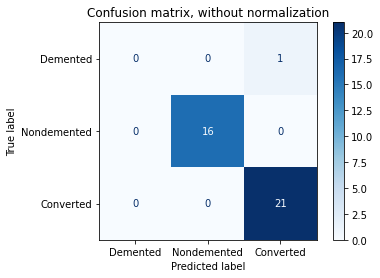

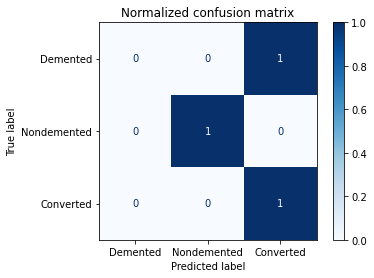

In [24]:
from sklearn.metrics import plot_confusion_matrix

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [25]:
# Calculate classification report

from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    Demented       0.00      0.00      0.00         1
 Nondemented       1.00      1.00      1.00        16
   Converted       0.95      1.00      0.98        21

    accuracy                           0.97        38
   macro avg       0.65      0.67      0.66        38
weighted avg       0.95      0.97      0.96        38

C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib

In [26]:
## DECISION TREE (150 SAMPLES) ##

from sklearn import tree

In [27]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7368421052631579

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))
print(rf.score(X_train, y_train))

0.9473684210526315
1.0


In [29]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.4124201784780028, 'CDR'),
 (0.17104426514991125, 'MMSE'),
 (0.0793496830640829, 'Age'),
 (0.076316545900853, 'nWBV'),
 (0.07349191028791255, 'eTIV'),
 (0.07225073968194409, 'ASF'),
 (0.04724755660733017, 'EDUC'),
 (0.03792384295283432, 'SES'),
 (0.015426275443839088, 'Female'),
 (0.0145290024332897, 'Male')]

In [30]:
## OVERSAMPLING ##

from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [31]:
# Define oversampling strategy

oversample = RandomOverSampler(sampling_strategy='minority')

In [32]:
# Fit and apply the transform

X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [33]:
# Summarize class distribution

print(Counter(y_train_over))

Counter({'Nondemented': 51, 'Converted': 51, 'Demented': 48})


In [38]:
## PCA - Principal Component Analysis ##

# Use StandardScaler for standardization ?
from sklearn.preprocessing import StandardScaler 
X_train_std = StandardScaler().fit_transform(X_train_over)
X_train_std

array([[ 1.32,  0.51,  0.68, ...,  1.22,  0.85, -0.85],
       [ 0.78, -0.91,  1.61, ...,  1.41,  0.85, -0.85],
       [-2.08,  1.21, -1.18, ..., -2.45, -1.18,  1.18],
       ...,
       [-1.54, -0.91, -0.25, ...,  0.83,  0.85, -0.85],
       [ 1.32, -0.91,  0.68, ...,  0.18,  0.85, -0.85],
       [ 1.05,  0.51, -0.25, ...,  0.36, -1.18,  1.18]])

In [39]:
X_test_std = StandardScaler().fit_transform(X_test)
X_test_std

array([[ 0.58,  0.13, -0.58, -2.31,  1.9 ,  1.36, -1.24, -1.25,  0.85,
        -0.85],
       [ 0.32,  0.53, -0.58,  0.53, -0.77, -0.79,  0.19,  0.73,  0.85,
        -0.85],
       [-0.31, -0.26,  0.36,  0.53,  0.56, -1.31,  0.4 ,  1.39,  0.85,
        -0.85],
       [-1.06, -0.26,  1.31,  0.85, -0.77,  0.15,  1.24, -0.27,  0.85,
        -0.85],
       [-1.31,  1.31, -0.58,  0.85, -0.77, -1.1 ,  1.65,  1.11,  0.85,
        -0.85],
       [ 0.07,  0.53,  0.36, -1.99,  0.56,  0.66, -0.97, -0.71, -1.17,
         1.17],
       [ 0.2 ,  1.31, -1.53, -0.73,  0.56,  0.67,  0.94, -0.72, -1.17,
         1.17],
       [-0.94, -0.26,  1.31, -1.99,  1.9 , -0.79, -1.24,  0.73, -1.17,
         1.17],
       [-0.56,  1.31, -1.53,  0.85, -0.77, -0.29, -0.19,  0.17,  0.85,
        -0.85],
       [ 1.59, -1.04,  0.36,  0.85, -0.77, -0.28, -0.9 ,  0.16,  0.85,
        -0.85],
       [ 0.7 ,  1.31, -0.58,  0.53, -0.77, -0.05, -1.19, -0.07,  0.85,
        -0.85],
       [ 0.58, -1.04,  1.31,  0.22, -0.77, 

In [40]:
# Use of Python library to directly compute Principal Components

from sklearn.decomposition import PCA
pca = PCA(n_components=2) # component can be changed to 3 ?

In [41]:
principalComponents = pca.fit_transform(X_train_std) 
principalDf_X_train = pd.DataFrame(data = principalComponents , columns = ['principal component 1','principal component 2'])
principalDf_X_train.head(5)

,principal component 1,principal component 2
0,-1.964278,-0.849267
1,-2.309098,2.177126
2,4.061622,0.063566
3,4.011240,0.546161
4,3.803049,-0.109650


In [42]:
# Added "Group" for 2D PCA projection of principalDf_X_train

finalDf_X_train = pd.concat([principalDf_X_train, pd.DataFrame(y, columns = ['Group'])], axis = 1) 
finalDf_X_train.head()

,principal component 1,principal component 2,Group
0,-1.964278,-0.849267,Nondemented
1,-2.309098,2.177126,NaN
2,4.061622,0.063566,Demented
3,4.011240,0.546161,NaN
4,3.803049,-0.109650,NaN


In [43]:
principalComponents = pca.fit_transform(X_test_std) 
principalDf_X_test = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])
principalDf_X_test.head(5)

,principal component 1,principal component 2
0,2.013096,-0.522614
1,-1.773489,-0.889524
2,-2.091473,0.920990
3,-1.433179,0.318195
4,-2.586603,-0.500146


In [44]:
# Added "Group" for 2D PCA projection of principalDf_X_test

finalDf_X_test = pd.concat([principalDf_X_test, pd.DataFrame(y, columns = ['Group'])], axis = 1) 
finalDf_X_test.head()

,principal component 1,principal component 2,Group
0,2.013096,-0.522614,Nondemented
1,-1.773489,-0.889524,NaN
2,-2.091473,0.920990,Demented
3,-1.433179,0.318195,NaN
4,-2.586603,-0.500146,NaN


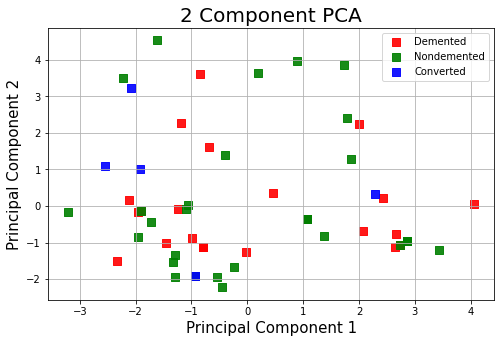

In [45]:
# Visualize 2D Projection of finalDf_X_train

fig = plt.figure(figsize = (8,5)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15) 
ax.set_ylabel('Principal Component 2', fontsize = 15) 
ax.set_title('2 Component PCA', fontsize = 20) 
targets = ['Demented', 'Nondemented', 'Converted'] 
colors = ['r', 'g', 'b'] 

for target, color in zip(targets,colors): 
    indicesToKeep = finalDf_X_train['Group'] == target
    ax.scatter(finalDf_X_train.loc[indicesToKeep, 'principal component 1'] , finalDf_X_train.loc[indicesToKeep, 'principal component 2'] , marker='s', c = color , s = 50, alpha=.9) 
ax.legend(targets) 
ax.grid()

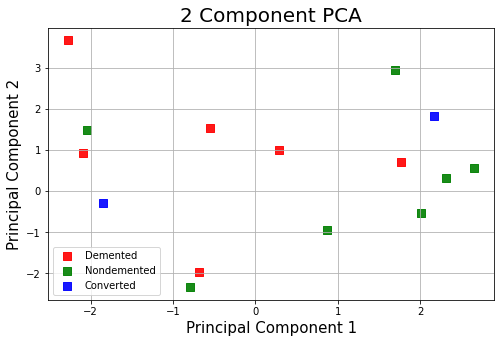

In [46]:
# Visualize 2D Projection of finalDf_X_test

fig = plt.figure(figsize = (8,5)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15) 
ax.set_ylabel('Principal Component 2', fontsize = 15) 
ax.set_title('2 Component PCA', fontsize = 20) 
targets = ['Demented', 'Nondemented', 'Converted'] 
colors = ['r', 'g', 'b'] 

for target, color in zip(targets,colors): 
    indicesToKeep = finalDf_X_test['Group'] == target
    ax.scatter(finalDf_X_test.loc[indicesToKeep, 'principal component 1'] , finalDf_X_test.loc[indicesToKeep, 'principal component 2'] , marker='s', c = color , s = 50, alpha=.9) 
ax.legend(targets) 
ax.grid()

In [47]:
## LOGISTIC REGRESSION with OVERSAMPLING ##

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)
classifier

LogisticRegression(max_iter=10000)

In [48]:
# Fit (train) or model using the training data

classifier.fit(principalDf_X_train, y_train_over)

LogisticRegression(max_iter=10000)

In [49]:
# Validate the model using the test data

print(f"Training Data Score: {classifier.score(principalDf_X_train, y_train_over)}")
print(f"Testing Data Score: {classifier.score(principalDf_X_test, y_test)}")

Training Data Score: 0.66
Testing Data Score: 0.6842105263157895


In [50]:
# Make predictions

predictions = classifier.predict(principalDf_X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Converted' 'Nondemented' 'Demented' 'Nondemented' 'Nondemented'
 'Demented' 'Converted' 'Demented' 'Nondemented' 'Nondemented']
First 10 Actual labels: ['Demented', 'Nondemented', 'Demented', 'Converted', 'Nondemented', 'Demented', 'Demented', 'Demented', 'Nondemented', 'Nondemented']


In [51]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Converted,Demented
1,Nondemented,Nondemented
2,Demented,Demented
3,Nondemented,Converted
4,Nondemented,Nondemented
5,Demented,Demented
6,Converted,Demented
7,Demented,Demented
8,Nondemented,Nondemented
9,Nondemented,Nondemented


In [52]:
## SVM with OVERSAMPLING ##

from sklearn.svm import SVC 
model = SVC(kernel='linear', probability=True)
model.fit(principalDf_X_train, y_train_over)

SVC(kernel='linear', probability=True)

In [53]:
# Model Accuracy

print('Test Accuracy: %.3f' % model.score(principalDf_X_test, y_test))

Test Accuracy: 0.684


In [54]:
# Calculate classification report

from sklearn.metrics import classification_report
predictions = model.predict(principalDf_X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    Demented       0.00      0.00      0.00         1
 Nondemented       0.75      0.75      0.75        16
   Converted       0.82      0.67      0.74        21

    accuracy                           0.68        38
   macro avg       0.52      0.47      0.50        38
weighted avg       0.77      0.68      0.72        38



In [55]:
## ROC - Receiver Operating Characteristic Curve (ROC AUC) - for imbalanced dataset ##

# Better representation of imbalanced learning #

from sklearn.metrics import roc_auc_score
roc = {label: [] for label in y_test.unique()}
#for label in y_test.unique():
#    model.fit(principalDf_X_train, train_class ==label)
#    predict_proba = model.predict_proba(principalDf_X_test)
#    roc[label] += roc_auc_score(y_test, predict_proba[:,1])
predict_proba = model.predict_proba(principalDf_X_test)
roc_auc_score(y_test, predict_proba, multi_class='ovr')

0.6951823624617743

Confusion matrix, without normalization
[[ 0  0  1]
 [ 2 12  2]
 [ 3  4 14]]
Normalized confusion matrix
[[0.   0.   1.  ]
 [0.12 0.75 0.12]
 [0.14 0.19 0.67]]


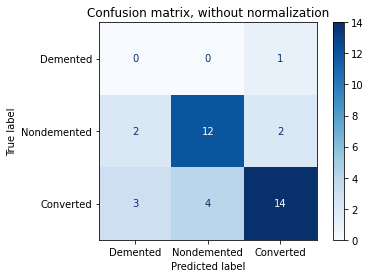

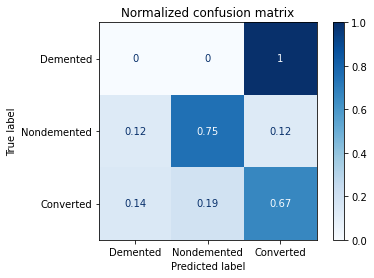

In [56]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, principalDf_X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [57]:
## Grid Search with SVM and OVERSAMPLING ##

# Create the GridSearch estimator along with a parameter object containing the values to adjust
# Passes through a combination and train model a number of times
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3, scoring="roc_auc_ovr")

In [58]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters

grid.fit(principalDf_X_train, y_train_over)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 2/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 3/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 4/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 5/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 1/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 2/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 3/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 4/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 5/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 1/5] END ...............................C=1, gamma=0.001; total time=   0.0s
[CV 2/5] END ...............................C=1,

GridSearchCV(estimator=SVC(kernel='linear', probability=True),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             scoring='roc_auc_ovr', verbose=3)

In [59]:
# List the best parameters for this dataset

print(grid.best_params_)

{'C': 5, 'gamma': 0.0005}


In [60]:
# List the best score

print(grid.best_score_)

0.7943398141819195


In [61]:
# Make predictions with the hypertuned model

predictions = grid.predict(principalDf_X_test)

In [62]:
# Calculate classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["Demented", "Nondemented", "Converted"]))

              precision    recall  f1-score   support

    Demented       0.00      0.00      0.00         1
 Nondemented       0.75      0.75      0.75        16
   Converted       0.82      0.67      0.74        21

    accuracy                           0.68        38
   macro avg       0.52      0.47      0.50        38
weighted avg       0.77      0.68      0.72        38



In [106]:
              precision    recall  f1-score   support

    Demented       0.00      0.00      0.00         1
 Nondemented       1.00      1.00      1.00        16
   Converted       0.95      1.00      0.98        21

    accuracy                           0.97        38
   macro avg       0.65      0.67      0.66        38
weighted avg       0.95      0.97      0.96        38

['Demented', 'Nondemented', 'Converted']